In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


ARX Model on Glucose, Bolus and Basal

In [2]:
import pandas as pd

# File path
file_path = '/content/drive/My Drive/Thesis/Subject54.xlsx'

# Load data from Excel file
cgm_df = pd.read_excel(file_path, sheet_name='CGM')
bolus_df = pd.read_excel(file_path, sheet_name='Bolus')
basal_df = pd.read_excel(file_path, sheet_name='Basal')

# Convert date columns to datetime format
cgm_df['date'] = pd.to_datetime(cgm_df['date'])
bolus_df['date'] = pd.to_datetime(bolus_df['date'])
basal_df['date'] = pd.to_datetime(basal_df['date'])

# Round date to the nearest 5 minutes
cgm_df['date'] = cgm_df['date'].dt.round('5min')
bolus_df['date'] = bolus_df['date'].dt.round('5min')
basal_df['date'] = basal_df['date'].dt.round('5min')

# Sort data chronologically
cgm_df = cgm_df.sort_values('date')
bolus_df = bolus_df.sort_values('date')
basal_df = basal_df.sort_values('date')

# Merge all dataframes on 'date' using an outer join to retain all records without backfilling
merged_df = cgm_df.merge(bolus_df, on='date', how='outer').merge(basal_df, on='date', how='outer')

# Forward fill basal data but not bolus data
merged_df['rate'] = merged_df['rate'].fillna(method='ffill')

# Keep only relevant columns
merged_df = merged_df[['date', 'mg/dl', 'normal', 'rate']]

# Drop rows where 'mg/dl' is NaN
merged_df = merged_df.dropna(subset=['mg/dl'])

# Create 12 lags for the 'mg/dl' column
for i in range(1, 13):
    merged_df[f'mg_dl_lag_{i}'] = merged_df['mg/dl'].shift(i)

# Create 12 lags for the 'normal' column
for i in range(1, 13):
    merged_df[f'normal_lag_{i}'] = merged_df['normal'].shift(i)

# Create 12 lags for the 'rate' column
for i in range(1, 13):
    merged_df[f'rate_lag_{i}'] = merged_df['rate'].shift(i)

# Replace all remaining NaN values with 0
merged_df.fillna(0, inplace=True)

# Display first few rows
merged_df.head()


<ipython-input-2-9ed207069f34>:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['rate'] = merged_df['rate'].fillna(method='ffill')


,date,mg/dl,normal,rate,mg_dl_lag_1,mg_dl_lag_2,mg_dl_lag_3,mg_dl_lag_4,mg_dl_lag_5,mg_dl_lag_6,...,rate_lag_3,rate_lag_4,rate_lag_5,rate_lag_6,rate_lag_7,rate_lag_8,rate_lag_9,rate_lag_10,rate_lag_11,rate_lag_12
0,2019-06-09 00:00:00,116.89884,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-09 00:05:00,113.90130,17.5,0.0,116.89884,0.00000,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-09 00:10:00,113.90130,0.0,0.0,113.90130,116.89884,0.00000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-09 00:15:00,114.90048,0.0,0.0,113.90130,113.90130,116.89884,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-09 00:20:00,113.90130,0.0,0.0,114.90048,113.90130,113.90130,116.89884,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
merged_df

,date,mg/dl,normal,rate,mg_dl_lag_1,mg_dl_lag_2,mg_dl_lag_3,mg_dl_lag_4,mg_dl_lag_5,mg_dl_lag_6,...,rate_lag_3,rate_lag_4,rate_lag_5,rate_lag_6,rate_lag_7,rate_lag_8,rate_lag_9,rate_lag_10,rate_lag_11,rate_lag_12
0,2019-06-09 00:00:00,116.89884,0.0,0.0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-09 00:05:00,113.90130,17.5,0.0,116.89884,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-09 00:10:00,113.90130,0.0,0.0,113.90130,116.89884,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-09 00:15:00,114.90048,0.0,0.0,113.90130,113.90130,116.89884,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-09 00:20:00,113.90130,0.0,0.0,114.90048,113.90130,113.90130,116.89884,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,2019-07-09 14:55:00,134.88318,0.0,1.2,136.88136,137.88054,138.87972,140.87790,143.87544,143.87544,...,0.9,1.5,1.8,2.1,0.9,0.0,0.0,0.0,1.2,1.8
8680,2019-07-09 15:00:00,132.88482,0.0,0.9,134.88318,136.88136,137.88054,138.87972,140.87790,143.87544,...,1.8,0.9,1.5,1.8,2.1,0.9,0.0,0.0,0.0,1.2
8681,2019-07-09 15:05:00,131.88582,0.0,0.9,132.88482,134.88318,136.88136,137.88054,138.87972,140.87790,...,2.1,1.8,0.9,1.5,1.8,2.1,0.9,0.0,0.0,0.0
8682,2019-07-09 15:10:00,131.88582,0.0,0.9,131.88582,132.88482,134.88318,136.88136,137.88054,138.87972,...,1.2,2.1,1.8,0.9,1.5,1.8,2.1,0.9,0.0,0.0


In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Drop rows with NaN values generated by shifting
merged_df = merged_df.dropna()

# Define the target variable (y)
y = merged_df['mg/dl']  # The target is mg/dl

# Define the predictors (X) - include rate and its lags
X = merged_df[[f'normal_lag_{i}' for i in range(1, 13)] +
              [f'mg_dl_lag_{i}' for i in range(1, 13)] +
              [f'rate_lag_{i}' for i in range(1, 13)]]  # Include rate lags here

# Add a constant to the predictors (for the intercept in the model)
X = sm.add_constant(X)

# Calculate the index for 80% training data
train_size = int(len(merged_df) * 0.8)

# Split the data into training and testing sets
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Train the ARX model (OLS)
model = sm.OLS(y_train, X_train)  # OLS = Ordinary Least Squares
results = model.fit()

# Print the summary of the model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  mg/dl   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 1.190e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        06:19:05   Log-Likelihood:                -20103.
No. Observations:                6836   AIC:                         4.028e+04
Df Residuals:                    6799   BIC:                         4.053e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4477      0.213     11.488

Root Mean Squared Error (RMSE): 4.1662


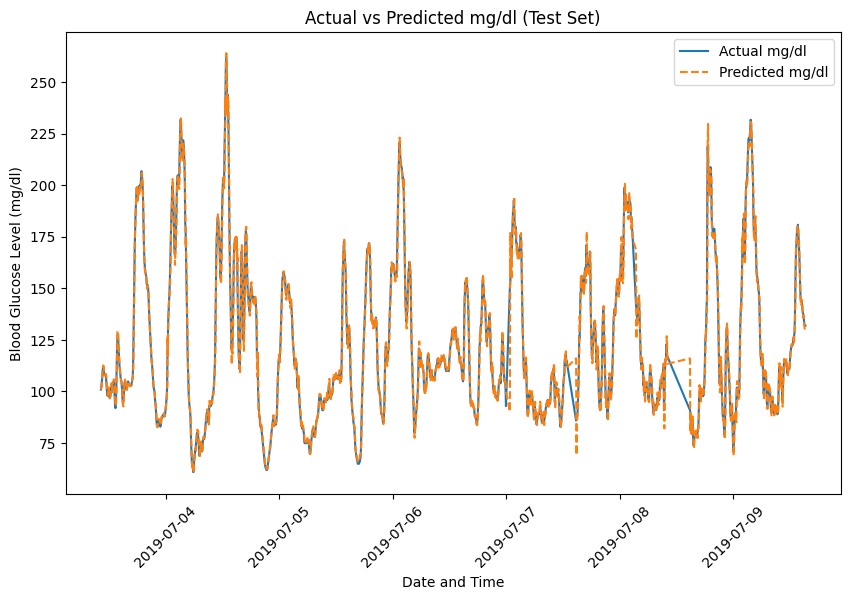

In [5]:
# Make predictions
predictions = results.predict(X_test)  # Predict on test data

# Compute RMSE
rmse = np.sqrt(((y_test - predictions) ** 2).mean())
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# Plot the actual vs predicted values for the test set
plt.figure(figsize=(10,6))

# Use datetime from merged_df for the x-axis
plt.plot(merged_df['date'].iloc[train_size:].values, y_test.values, label='Actual mg/dl')
plt.plot(merged_df['date'].iloc[train_size:].values, predictions, label='Predicted mg/dl', linestyle='--')

plt.legend()
plt.xlabel('Date and Time')
plt.ylabel('Blood Glucose Level (mg/dl)')
plt.title('Actual vs Predicted mg/dl (Test Set)')
plt.xticks(rotation=45)  # Rotate datetime labels for better readability
plt.show()


MPC

In [6]:
# Extract model coefficients (these should be from your trained ARX model)
coefficients = results.params  # Use the OLS results from your earlier model

def arx_predict(x_t, bolus_t, basal_t, lag_values):
    """
    Predicts the blood glucose at time t using an ARX model (autoregressive with exogenous inputs).
    Arguments:
    - x_t: Current blood glucose level (this is the target we're predicting)
    - bolus_t: Current bolus insulin dose
    - basal_t: Current basal insulin rate
    - lag_values: Dictionary containing lagged values for blood glucose, bolus, and basal

    Returns:
    - predicted_bg: The predicted blood glucose for the next time step
    """
    # Exclude the current blood glucose from the features
    features = np.array([
        1,  # Constant term (intercept)
    ] + [lag_values[f'normal_lag_{i}'] for i in range(1, 13)] +
      [lag_values[f'rate_lag_{i}'] for i in range(1, 13)] +
      [lag_values[f'mg_dl_lag_{i}'] for i in range(1, 13)])

    # Ensure the coefficients vector is correctly aligned with the features vector
    coefficients = np.array(results.params)

    # Calculate the predicted blood glucose (dot product of coefficients and features)
    predicted_bg = np.dot(coefficients, features)

    return predicted_bg


In [7]:
from scipy.optimize import minimize

# Define target blood glucose
target_bg = 100  # Example target blood glucose level (mg/dl)

# Define the prediction horizon
N = 12  # Number of steps to look ahead

# Cost function: sum of squared errors between predicted BG and target BG
def cost_function(u, x_0, lag_values, model, N, target_bg):
    """
    Compute the cost (sum of squared errors) between predicted blood glucose
    and target blood glucose for the prediction horizon.
    Arguments:
    - u: insulin doses (bolus and basal) for the entire prediction horizon (length 2 * N)
    - x_0: current blood glucose level (initial state)
    - lag_values: dictionary of lagged values (for mg/dl, normal, rate)
    - model: ARX prediction function
    - N: prediction horizon (number of steps to predict ahead)
    - target_bg: target blood glucose level to achieve

    Returns:
    - Total cost (sum of squared errors between predicted BG and target BG)
    """
    total_cost = 0
    # Initialize current blood glucose to be the current state
    current_bg = x_0

    # Split u into bolus and basal doses over the horizon
    bolus_doses = u[:N]  # First N values correspond to bolus
    basal_doses = u[N:]  # Last N values correspond to basal

    # Loop over the prediction horizon
    for i in range(N):
        # Predict the blood glucose for the next time step using the ARX model
        predicted_bg = model(current_bg, bolus_doses[i], basal_doses[i], lag_values)

        # Add the squared error between predicted BG and target BG to the total cost
        total_cost += (predicted_bg - target_bg) ** 2

        # Update the current blood glucose for the next prediction (simple model assumption)
        current_bg = predicted_bg

    return total_cost


In [8]:
from scipy.optimize import minimize
import numpy as np

# Define target blood glucose
target_bg = 100  # Example target blood glucose level (mg/dl)

# Define the prediction horizon
N = 12  # Number of steps to look ahead

# Cost function: sum of squared errors between predicted BG and target BG
def cost_function(u, x_0, lag_values, model, N, target_bg):
    """
    Compute the cost (sum of squared errors) between predicted blood glucose
    and target blood glucose for the prediction horizon.
    Arguments:
    - u: insulin doses (bolus and basal) for the entire prediction horizon (length 2 * N)
    - x_0: current blood glucose level (initial state)
    - lag_values: dictionary of lagged values (for mg/dl, normal, rate)
    - model: ARX prediction function
    - N: prediction horizon (number of steps to predict ahead)
    - target_bg: target blood glucose level to achieve

    Returns:
    - Total cost (sum of squared errors between predicted BG and target BG)
    """
    total_cost = 0
    # Initialize current blood glucose to be the current state
    current_bg = x_0

    # Split u into bolus and basal doses over the horizon
    bolus_doses = u[:N]  # First N values correspond to bolus
    basal_doses = u[N:]  # Last N values correspond to basal

    # Loop over the prediction horizon
    for i in range(N):
        # Predict the blood glucose for the next time step using the ARX model
        predicted_bg = model(current_bg, bolus_doses[i], basal_doses[i], lag_values)

        # Add the squared error between predicted BG and target BG to the total cost
        total_cost += (predicted_bg - target_bg) ** 2

        # Update the current blood glucose for the next prediction (simple model assumption)
        current_bg = predicted_bg

    return total_cost


# Define constraints for insulin doses
def insulin_constraints(u):
    """
    Constraints for the insulin doses (bolus and basal).
    - Bolus doses should be between 0 and 10 units.
    - Basal rates should be between 0 and 1 unit per hour.
    """
    bolus_doses = u[:N]  # First N values correspond to bolus
    basal_doses = u[N:]  # Last N values correspond to basal

    # Return the inequality constraints as a single array.
    # We want each dose to be within the bounds, so we'll return
    # array that's positive when the constraint is satisfied and negative otherwise.
    return np.concatenate((
        10 - np.array(bolus_doses), # Bolus doses <= 10
        np.array(bolus_doses),    # Bolus doses >=0
        1 - np.array(basal_doses), # Basal doses <=1
        np.array(basal_doses)     # Basal doses >= 0
        ))


# Initial guess for the optimization (starting with 0 insulin doses)
u_initial = [0] * (2 * N)  # Length of 2 * N (N bolus doses and N basal rates)

# Define the initial blood glucose level (e.g., from the most recent data)
x_0 = merged_df['mg/dl'].iloc[-1]  # Current blood glucose (last value in dataset)

# Define the lagged values dictionary (example, use actual lag values)
lag_values = {
    f'mg_dl_lag_{i}': 0 for i in range(1, 13)
}
lag_values.update({
    f'normal_lag_{i}': 0 for i in range(1, 13)
})
lag_values.update({
    f'rate_lag_{i}': 0 for i in range(1, 13)
})


# Set bounds for the insulin doses
bounds = [(0, 10)] * N + [(0, 1)] * N

# Run optimization to find the optimal insulin doses for the prediction horizon
result = minimize(
    cost_function,  # The cost function to minimize
    u_initial,  # Initial guess for the optimization
    args=(x_0, lag_values, arx_predict, N, target_bg),  # Arguments to the cost function
    constraints={'type': 'ineq', 'fun': insulin_constraints},  # Apply inequality constraints
    bounds = bounds, # Apply bounds
    method='SLSQP',  # Sequential Least Squares Quadratic Programming (optimization method)
    options={'disp': True}  # Display optimization progress
)

# Display the optimal insulin doses
optimal_doses = result.x
print(f"Optimal insulin doses (bolus and basal) over the prediction horizon:\n{optimal_doses}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 114197.3501861285
            Iterations: 1
            Function evaluations: 25
            Gradient evaluations: 1
Optimal insulin doses (bolus and basal) over the prediction horizon:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
